# <center>1</center>

## CNN Model Vanila Version

In [1]:
import numpy as np
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1) / 255.0  # Normalize pixel values
x_test = np.expand_dims(x_test, axis=-1) / 255.0
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode labels
y_test = to_categorical(y_test, num_classes=10)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

stTime = time.time()
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
endTime = time.time()
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print(f"Total Time: {endTime - stTime}")





Epoch 1/5


750/750 [==============================] - 15s 17ms/step - loss: 0.2144 - accuracy: 0.9321 - val_loss: 0.0704 - val_accuracy: 0.9789
Epoch 2/5
750/750 [==============================] - 12s 16ms/step - loss: 0.0573 - accuracy: 0.9818 - val_loss: 0.0544 - val_accuracy: 0.9837
Epoch 3/5
750/750 [==============================] - 12s 17ms/step - loss: 0.0414 - accuracy: 0.9868 - val_loss: 0.0465 - val_accuracy: 0.9864
Epoch 4/5
750/750 [==============================] - 13s 17ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0645 - val_accuracy: 0.9811
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0355 - accuracy: 0.9888
Test accuracy: 0.9887999892234802
Total Time: 65.23960161209106


## Model Summary

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [4]:
len(model.layers)

8

In [6]:
len(model.weights)

10

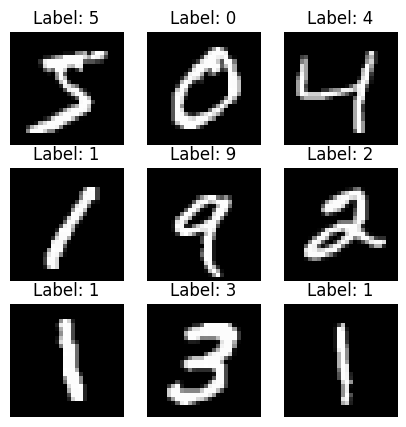

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Plot the first 9 images
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

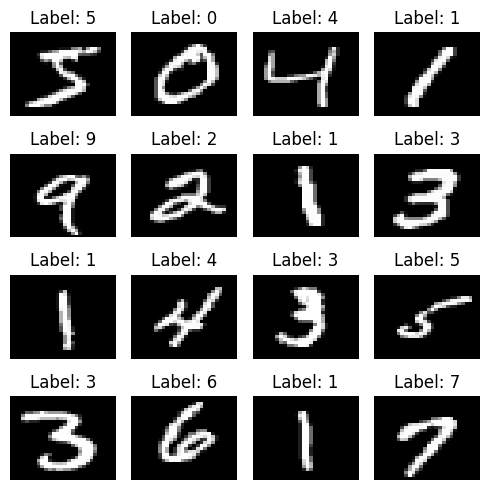

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Plot the first 16 images
plt.figure(figsize=(5,5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    sns.heatmap(x_train[i], cmap='gray', cbar=False)
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Confusion Matrix

313/313 [==============================] - 2s 5ms/step


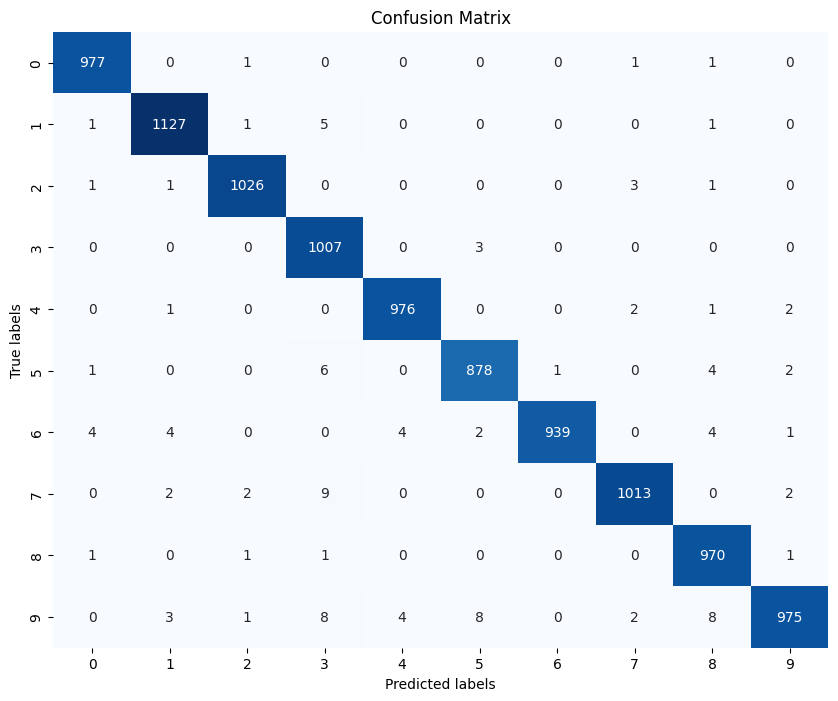

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

print(rank)

0


Error: no executable specified.


## Using MPI

In [11]:
!mpiexec -n 8 python 02.UsingMPI.py

Rank: 4, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 2, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 0, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)


Rank: 1, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 6, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 5, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 7, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 3, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 5, Test Loss: 0.11396191269159317
Rank: 5, Test Accuracy:0.9661999940872192
Total Time Taken by process 5 is 23.599470853805542
Rank: 6, Test Loss: 0.1013447567820549
Rank: 6, Test Accuracy:0.9656000137329102
Total Time Taken by process 6 is 23.7004075050354
Rank: 3, Test Loss: 0.1014571413397789
Rank: 3, Test Accuracy:0.9679999947547913
Total Time Taken by process 3 is 26.472946882247925
Rank: 4, Test Loss: 0.09557531774044037
Rank: 4,

2024-02-28 11:28:39.020610: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur
2
n
0
 
2
t
4
h
-
e
0
m
2
 
-
o
2
f
8
f
 
,
1
 
1
s
:
e
2
t
8
 
:
t
3
h
9
e
.
 
0
e
2
n
5
v
1
i
3
r
7
o
:
n
 
m
I
e
 
n
t
t
e
 
n
v
s
a
o
r
r
i
f
a
l
b
o
l
w
e
/
 
c
`
o
T
r
F
e
_
/
E
u
N
t
A
i
B
l
L
/
E
p
_
o
O
r
N
t
E
.
D
c
N
c
N
:
_
1
O
1
P
3
T
]
S
 
=
o
0
n
`
e
.
D

NN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-28 11:28:39.040722: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point roun
2
d
0
-
2
o
4
f
-
f
0
 
2
e
-
r
2
r
8
o
 
r
1
s
1
 
:
f
2
r
8
o
:
m
3
 
9
d
.
i
0
f
4
f
3
e
6
r
6
e
7
n

# <center>2</center>

## VGG 

In [18]:
import numpy as np
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1) / 255.0  # Normalize pixel values
x_test = np.expand_dims(x_test, axis=-1) / 255.0
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode labels
y_test = to_categorical(y_test, num_classes=10)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

stTime = time.time()
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)
endTime = time.time()
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print(f"Total Time: {endTime - stTime}")


Epoch 1/2
750/750 [==============================] - 17s 17ms/step - loss: 0.2130 - accuracy: 0.9369 - val_loss: 0.0750 - val_accuracy: 0.9772
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 0.0518 - accuracy: 0.9838
Test accuracy: 0.9837999939918518
Total Time: 29.64335346221924


## Model Summary

In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_11 (Dense)            (None, 64)               

313/313 [==============================] - 1s 4ms/step


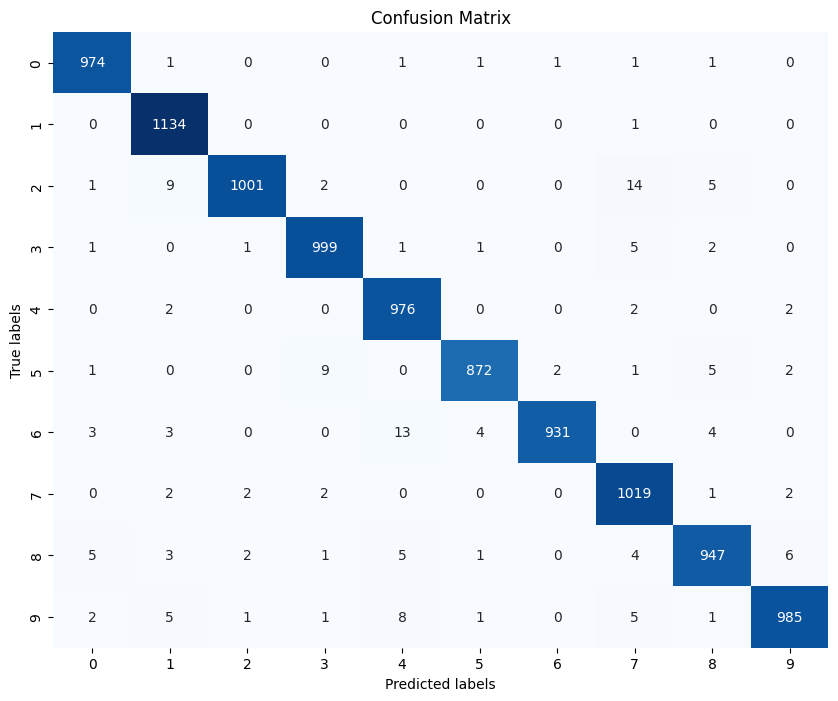

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Using MPI

In [21]:
!mpiexec -n 8 python 06.VGGUsingMPI.py

Rank: 5, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 3, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 0, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 6, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 4, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 2, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 1, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 7, Training data Size: X--> (7500, 28, 28, 1), y--> (7500, 10)
Rank: 6, Test Loss: 0.20401740074157715
Rank: 6, Test Accuracy:0.9340000152587891
Total Time Taken by process 6 is 15.515111446380615
Rank: 1, Test Loss: 0.16254326701164246
Rank: 1, Test Accuracy:0.9516000151634216
Total Time Taken by process 1 is 18.121830224990845
Rank: 2, Test Loss: 0.13806942105293274
Rank: 2, Test Accuracy:0.9605000019073486
Total Time Taken by process 2 is 18.58545207977295
Rank: 4, Test Loss: 0.14018957316875458
Rank: 4

2024-02-
2
2
0
8
2
 
4
1
-
2
0
:
2
0
-
3
2
:
8
5
 
2
1
.
2
7
:
9
0
5
3
1
:
4
5
6
2
:
.
 
7
I
9
2
 
5
0
t
1
2
e
8
4
n
3
-
s
2
:
0
o
2
0
 
2
r
0
2
I
-
f
2
4
 
2
2
l
4
2
-
t
8
0
o
-
2
0
0
e
 
2
w
0
0
2
2
n
1
4
/
2
2
4
-
s
2
-
c
-
4
-
2
o
:
0
o
2
-
0
8
r
0
2
r
8
0
2
 
f
3
-
e
 
2
-
1
l
:
2
/
1
-
2
2
o
5
8
u
2
2
8
:
w
2
 
t
:
8
 
0
/
.
1
i
0
 
1
3
c
7
2
l
3
1
2
:
o
9
:
/
:
2
:
5
r
6
0
p
5
:
0
2
e
4
3
o
2
0
3
.
/
7
:
r
.
3
:
7
u
1
5
t
7
:
5
9
t
:
2
.
9
5
2
6
i
 
.
c
6
2
.
9
l
I
7
c
0
.
7
0
/
 
9
:
6
7
9
9
p
t
7
1
9
9
7
:
o
e
7
1
:
8
8
 
r
n
1
3
 
2
5
I
t
s
8
]
I
5
5
 
.
o
:
 
 
8
:
t
c
r
 
o
t
:
 
e
c
f
I
n
e
 
I
n
:
l
 
e
n
I
 
s
1
o
t
D
s
 
t
o
1
w
e
N
o
t
e
r
3
/
n
N
r
e
n
f
]
c
s
 
f
n
s
l
 
o
o
c
l
s
o
o
o
r
r
u
o
o
r
w
n
e
f
s
w
r
f
/
e
/
l
t
/
f
l
c
D
u
o
o
c
l
o
o
N
t
w
m
o
o
w
r
N
i
/
 
r
w
/
e
 
l
c
o
e
/
c
/
c
/
o
p
/
c
o
u
u
p
r
e
u
o
r
t
s
o
e
r
t
r
e
i
t
r
/
a
i
e
/
l
o
t
u
t
l
/
u
/
m
.
t
i
/
u
t
p
 
c
i
o
p
t
i
o
o
c
l
n
o
i
l
r
p
:
/
s
r
l
/
t
e
1
p
 
t
/
p
.
r
1
o
a
.
p
o
c

In [8]:
weights = model.get_weights()
weights[9]

array([ 0.02803313,  0.00367356, -0.04158924, -0.02121072,  0.01618083,
        0.00540878, -0.0337662 ,  0.00811086,  0.03120071, -0.00599583],
      dtype=float32)

In [7]:
n = []
weight1 = model.get_weights()
weights = model.get_weights()
weight2 = model.get_weights()
weight3 = model.get_weights()
weight4 = model.get_weights()
weight5 = model.get_weights()
weight6 = model.get_weights()
weight7 = model.get_weights()
kk = [weights, weight1, weight2, weight3, weight4, weight5,
       weight6, weight7]
w = 0
for i in range(10):
    for j in range(8):
        w += kk[j][i]
    n.append(w)
    w = 0
n[9]

array([ 0.22426507,  0.02938849, -0.33271387, -0.16968581,  0.12944663,
        0.04327026, -0.27012965,  0.0648869 ,  0.24960564, -0.04796667],
      dtype=float32)

In [14]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Define the local CNN model
def create_local_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train multiple local models
num_local_models = 2
local_models = [create_local_model() for _ in range(num_local_models)]
for model in local_models:
    model.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

# Combine model weights by averaging
global_weights = []
for layer_idx in range(len(local_models[0].get_weights())):
    layer_weights = [model.get_weights()[layer_idx] for model in local_models]
    layer_average_weights = np.mean(layer_weights, axis=0)
    global_weights.append(layer_average_weights)

# Create a global model with averaged weights
global_model = create_local_model()
global_model.set_weights(global_weights)

# Evaluate the global model
test_loss, test_accuracy = global_model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)



Epoch 1/2
750/750 [==============================] - 13s 16ms/step - loss: 0.2037 - accuracy: 0.9385 - val_loss: 0.0735 - val_accuracy: 0.9796
Epoch 2/2
750/750 [==============================] - 13s 17ms/step - loss: 0.0613 - accuracy: 0.9813 - val_loss: 0.0647 - val_accuracy: 0.9824
Epoch 1/2
750/750 [==============================] - 15s 18ms/step - loss: 0.2037 - accuracy: 0.9383 - val_loss: 0.0679 - val_accuracy: 0.9804
Epoch 2/2
750/750 [==============================] - 13s 17ms/step - loss: 0.0567 - accuracy: 0.9822 - val_loss: 0.0543 - val_accuracy: 0.9843
Test Loss: 1.5404547452926636
Test Accuracy: 0.775600016117096


In [32]:
len(local_models[0].get_weights())

8

In [29]:
for layer_idx in range(len(local_models[0].get_weights())):
    layer_weights = [model.get_weights()[layer_idx] for model in local_models]
    layer_average_weights = np.mean(layer_weights, axis=0)
    global_weights.append(layer_average_weights)
print(layer_average_weights)
global_weights

[-5.5341739e-03  2.7820321e-02 -1.0994218e-02  7.8351023e-03
 -2.8149430e-02  1.9055814e-02 -1.5192226e-02  4.2721694e-03
  4.4883694e-05 -8.1590209e-03]


[array([[[[-0.072983  , -0.03275631, -0.1072081 , -0.10788899,
           -0.06307754,  0.00141327,  0.03848143, -0.00262933,
           -0.0739884 ,  0.08764531,  0.05115508,  0.03459658,
           -0.030625  , -0.22423255,  0.00971382, -0.00874731,
            0.01178457,  0.13503109, -0.04341918, -0.03691459,
            0.15749696,  0.10470209, -0.05159912,  0.02760674,
            0.04670298, -0.11109212, -0.05298586, -0.09627672,
            0.1317909 ,  0.00741143,  0.14780706,  0.03673151]],
 
         [[-0.20952381,  0.0594715 , -0.08396156,  0.07781763,
            0.12281722, -0.01923816,  0.19109666,  0.12367772,
           -0.00743249,  0.00584441, -0.09940669, -0.08095032,
           -0.11386141, -0.09357385,  0.10538556,  0.03534646,
           -0.06569508,  0.02093276, -0.02922726, -0.01751959,
            0.03040775, -0.00267728, -0.02170255,  0.0130156 ,
            0.11596676, -0.08477625, -0.00534803,  0.05424216,
            0.0538973 , -0.02134688, -0.01529083,  

In [31]:
round(0.9751833279927572, 2)

0.98

In [15]:
len(local_models[0].get_weights())

8

In [10]:
weights = model.get_weights

<bound method Functional.get_weight_paths of <keras.src.engine.sequential.Sequential object at 0x000002585E96E250>>

In [3]:
import time

stTime = time.time()

for i in range(10000000):
    i*i

endTime = time.time()

print(f"{endTime-stTime}")

1.0757136344909668


In [4]:
l = [1,2,3,4]
sum(l)

10